In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('customer_data.csv')

if df.isnull().sum().any():
    df.fillna(df.mean(), inplace=True) 

# Assuming 'Spending_Score' is the target variable and the rest are features
X = df.drop('Spending_Score', axis=1)
Y = df['Spending_Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

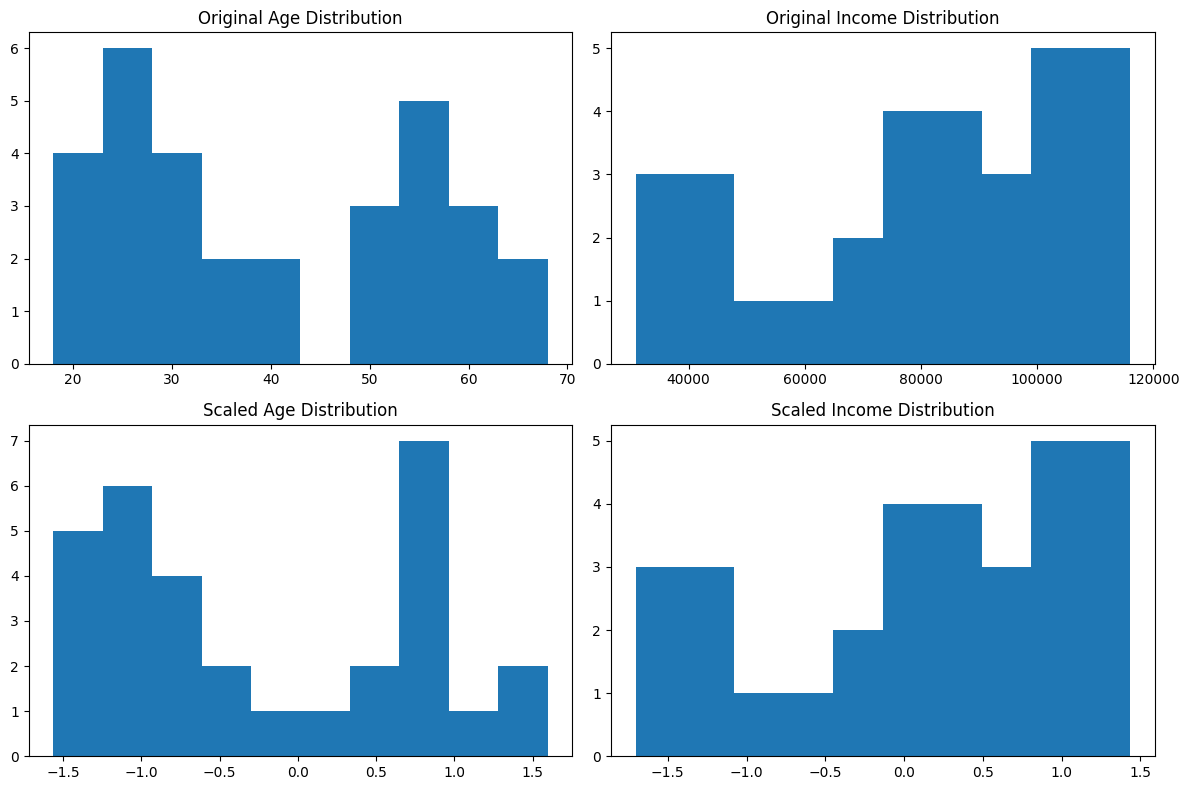

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original Data Plots
axes[0, 0].hist(X_test['Age'])
axes[0, 0].set_title('Original Age Distribution')
axes[0, 1].hist(X_test['Income'])
axes[0, 1].set_title('Original Income Distribution')

# Scaled Data Plots
axes[1, 0].hist(X_test_scaled_df['Age'])
axes[1, 0].set_title('Scaled Age Distribution')
axes[1, 1].hist(X_test_scaled_df['Income'])
axes[1, 1].set_title('Scaled Income Distribution')

plt.tight_layout()
plt.show()

In [20]:
# Model evaluation with scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization and training
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# Making predictions
predictions = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')


MSE: 732.3551245668029
R-squared: -0.027105564211052702


In [2]:
import matplotlib.pyplot as plt

plt.scatter(X_test_scaled[:, 0], Y_test, color='blue', label='Actual')
plt.scatter(X_test_scaled[:, 0], predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted Spending Scores')
plt.xlabel('Scaled Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Displaying coefficients
coefficients = model.coef_
print("Coefficients for each independent variable:", coefficients)

NameError: name 'X_test_scaled' is not defined

In [24]:
def predict_original_scale_dataframe(model, scaler, input_df):
    input_scaled = scaler.transform(input_df)

    # Making predictions
    predictions = model.predict(input_scaled)

    # Returning predictions as a pandas Series
    return pd.Series(predictions)

# Example usage
input_df = pd.DataFrame({'Age': [25], 'Income': [50000]})  # Values to put into inference
predictions = predict_original_scale_dataframe(model, scaler, input_df)
print(predictions[0]) # there's only one prediction, but predict_original_scale_dataframe would crunch an entire df at once.

48.57488877753046
